# Pull in clustering data and make a readable dataframe from it

In [1]:
import pandas as pd
import numpy as np

In [27]:
mod = pd.read_csv("data/clustering_result.txt", sep=" ", header=None)
mod.rename(columns={0: "id", 1: "0.0"}, inplace=True)
mod

,id,0.0
0,720575940600433181,1
1,720575940600646173,1
2,720575940602120928,2
3,720575940602132509,1
4,720575940602309600,1
...,...,...
21937,720575940661321857,1
21938,720575940661325697,12
21939,720575940661329281,6
21940,720575940661335681,3


In [28]:
types = pd.read_csv("/Users/ggutierr/Documents/FlyWireData/consolidated_cell_types.csv")
types.rename(columns={"root_id": "id"}, inplace=True)
types

,id,primary_type,additional_type(s)
0,720575940596125868,T5c,NaN
1,720575940597856265,Tm16,NaN
2,720575940597944841,Tm7,CB3851
3,720575940598267657,TmY15,NaN
4,720575940599333574,Tm1,NaN
...,...,...,...
137682,720575940661335681,CB0180,NaN
137683,720575940661336193,TmY3,NaN
137684,720575940661337217,KCab-p,NaN
137685,720575940661338497,CB0904,NaN


In [4]:
# Clusters the modularity found
mod['0.0'].value_counts().sort_index()

0.0
1     4686
2     3823
3     3691
4      513
5     2562
6      551
7     1696
8     4113
9        7
10       2
11      18
12     186
13       2
14      14
15       2
16       7
17       5
18       2
19       2
20       3
21       4
22       2
23       2
24       2
25       3
26       2
27       2
28       2
29       2
30       2
31       2
32       2
33       2
34       2
35       2
36       3
37       2
38       2
39       2
40       2
41       2
42       2
43       2
44       2
45       3
46       2
Name: count, dtype: int64

In [29]:
# merge on id but keeping all the neurons in the modularity list (left join)
merged_auditory = pd.merge(mod, types, on="id", how="left")
#merged_auditory = merged_auditory.drop(columns=['additional_type(s)'])
merged_auditory

,id,0.0,primary_type,additional_type(s)
0,720575940600433181,1,JO-B,NaN
1,720575940600646173,1,JO-mz,NaN
2,720575940602120928,2,CB1783,AVLP_pr36
3,720575940602132509,1,JO-EVM,NaN
4,720575940602309600,1,NaN,NaN
...,...,...,...,...
21937,720575940661321857,1,PLP160,NaN
21938,720575940661325697,12,MTe07,"hb-1036546847, hb-1190339995, hb-5812983942, h..."
21939,720575940661329281,6,CB2488,NaN
21940,720575940661335681,3,CB0180,NaN


In [7]:
# save merged auditory
merged_auditory.to_csv("data/mod_auditory_neurons.txt", index=False)

In [6]:
merged_auditory[merged_auditory['additional_type(s)']=='WED_pr02']

,id,0.0,primary_type,additional_type(s)
4296,720575940615930299,1,CB3491,WED_pr02
4485,720575940616211013,1,CB3491,WED_pr02
7439,720575940620738799,1,CB2228,WED_pr02
7762,720575940621146771,1,CB1383,WED_pr02
9968,720575940623688119,1,CB1760,WED_pr02
10330,720575940624134296,1,CB1948,WED_pr02
11784,720575940625887631,1,CB3491,WED_pr02
13064,720575940627218882,1,CB1948,WED_pr02
13233,720575940627378476,1,CB2023,WED_pr02
14014,720575940628267264,1,SAD021_a,WED_pr02


In [30]:
# Some auditory neurons with selectivity labels provided by Ian from Sama's lab
train_dat = pd.read_csv("data/train_dat.csv")
train_dat

,Unnamed: 0,Flywire 2024 ID,Neuropils,preference,# imaged females,# responding females,prop females with auditory responses
0,0,720575940619783518,AVLP_pr01,sine,4,4,1.000000
1,1,720575940620062633,AVLP_pr01,sine,4,4,1.000000
2,2,720575940602914988,AVLP_pr01,sine,4,4,1.000000
3,3,720575940620195719,AVLP_pr01,sine,4,4,1.000000
4,4,720575940634508174,AVLP_pr01,sine,4,4,1.000000
...,...,...,...,...,...,...,...
398,398,720575940655398817,GNG_pr01,sine,17,4,0.235294
399,399,720575940630203589,GNG_pr01,sine,17,4,0.235294
400,400,720575940617641077,GNG_pr01,sine,17,4,0.235294
401,401,720575940612801022,GNG_pr01,sine,17,4,0.235294


In [31]:
# merge selectivity labels onto merged_auditory
merged_auditory = pd.merge(merged_auditory, train_dat[['Flywire 2024 ID','Neuropils','preference']], left_on="id", right_on='Flywire 2024 ID', how="left")

# drop the extra column
merged_auditory = merged_auditory.drop(columns=['Flywire 2024 ID'])

merged_auditory

,id,0.0,primary_type,additional_type(s),Neuropils,preference
0,720575940600433181,1,JO-B,NaN,NaN,NaN
1,720575940600646173,1,JO-mz,NaN,NaN,NaN
2,720575940602120928,2,CB1783,AVLP_pr36,AVLP_pr36,pulse
3,720575940602132509,1,JO-EVM,NaN,NaN,NaN
4,720575940602309600,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
21937,720575940661321857,1,PLP160,NaN,NaN,NaN
21938,720575940661325697,12,MTe07,"hb-1036546847, hb-1190339995, hb-5812983942, h...",NaN,NaN
21939,720575940661329281,6,CB2488,NaN,NaN,NaN
21940,720575940661335681,3,CB0180,NaN,NaN,NaN


There are 2 neurons missing from the modularity data. I don't think those neurons were missing from the original list of auditory neurons provided to us since that list has the same length as merged_auditory and the mod df. For that reason, they couldn't have been dropped during modularity. 

In [10]:
train_dat.value_counts('preference').sort_index()

preference
intermediate    117
pulse           176
sine            110
Name: count, dtype: int64

In [9]:
merged_auditory.value_counts('preference').sort_index()

preference
intermediate    117
pulse           174
sine            110
Name: count, dtype: int64

There are neurons of all preferences spread out all over the largest modules.

In [14]:
merged_auditory[merged_auditory['preference']=='pulse'].value_counts('0.0').sort_index()

0.0
1    120
2     22
3      1
4      4
6      2
8     25
Name: count, dtype: int64

In [16]:
merged_auditory[merged_auditory['preference']=='sine'].value_counts('0.0').sort_index()

0.0
1    84
2    10
3     1
4     2
6     3
8    10
Name: count, dtype: int64

In [17]:
merged_auditory[merged_auditory['preference']=='intermediate'].value_counts('0.0').sort_index()

0.0
1    82
2    13
4     6
6     5
8    11
Name: count, dtype: int64

In [23]:
merged_auditory.value_counts('Neuropils').sort_index()

Neuropils
A2                  2
AVLP/PVLP           1
AVLP/PVLP_pr01      3
AVLP_pr01          20
AVLP_pr02           6
AVLP_pr04           2
AVLP_pr05          18
AVLP_pr11           3
AVLP_pr12          16
AVLP_pr18           4
AVLP_pr22           9
AVLP_pr23           2
AVLP_pr31           8
AVLP_pr32           3
AVLP_pr36          22
B1                120
B2                  6
GNG_pr01           13
IPS/WED_pr01       21
IPS_pr01           20
IPS_pr02            2
PVLP_pr03          17
SAD_pr02           17
WED-VLP            32
WED_pr01           13
WED_pr02           21
Name: count, dtype: int64

In [20]:
merged_auditory[merged_auditory['0.0']==1].value_counts('Neuropils').sort_index()

Neuropils
A2                2
AVLP_pr01        18
AVLP_pr02         5
AVLP_pr05         6
AVLP_pr22         1
AVLP_pr31         2
B1              118
B2                6
GNG_pr01          7
IPS/WED_pr01     21
IPS_pr01         15
IPS_pr02          2
SAD_pr02         17
WED-VLP          32
WED_pr01         13
WED_pr02         21
Name: count, dtype: int64

# Pie charts of modularity and tuning

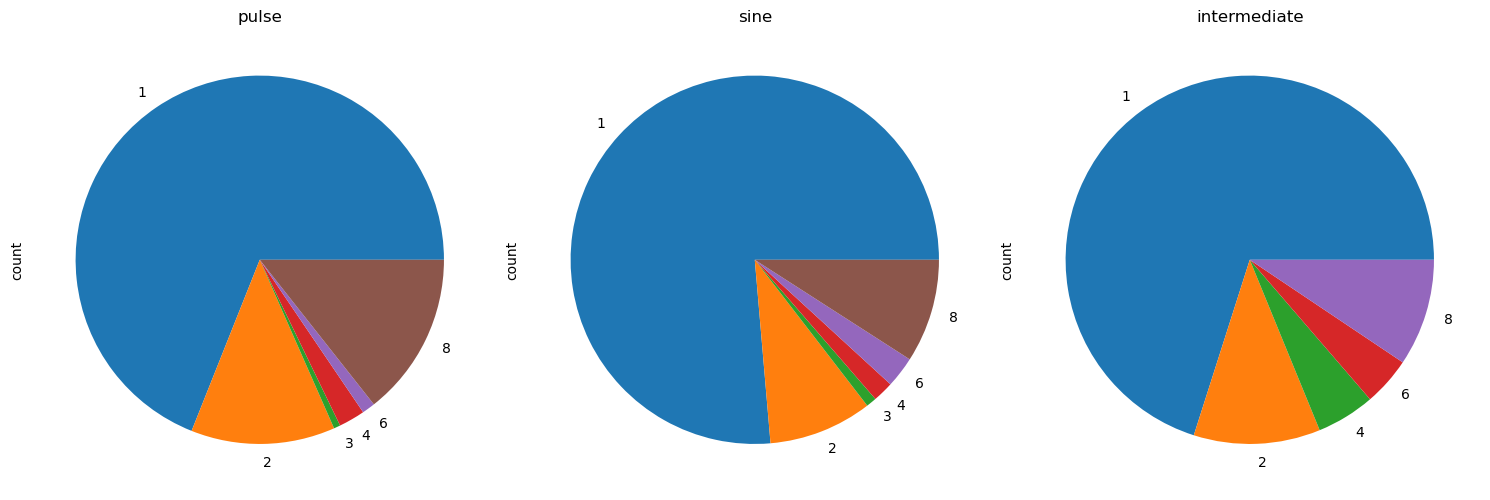

In [11]:
import matplotlib.pyplot as plt

# pie chart of the modules for each preference
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
merged_auditory[merged_auditory['preference']=='pulse'].value_counts('0.0').sort_index().plot(kind='pie', ax=ax[0], title='pulse')
merged_auditory[merged_auditory['preference']=='sine'].value_counts('0.0').sort_index().plot(kind='pie', ax=ax[1], title='sine')
merged_auditory[merged_auditory['preference']=='intermediate'].value_counts('0.0').sort_index().plot(kind='pie', ax=ax[2], title='intermediate')
plt.tight_layout()
#plt.savefig("figures/pie_modules.png", dpi=300)
plt.show()

/var/folders/qb/p6dbns6n14n6pl5jy5tkwp78xfrsnf/T/ipykernel_65913/2212944924.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_auditory['preference'].fillna('NaN', inplace=True)


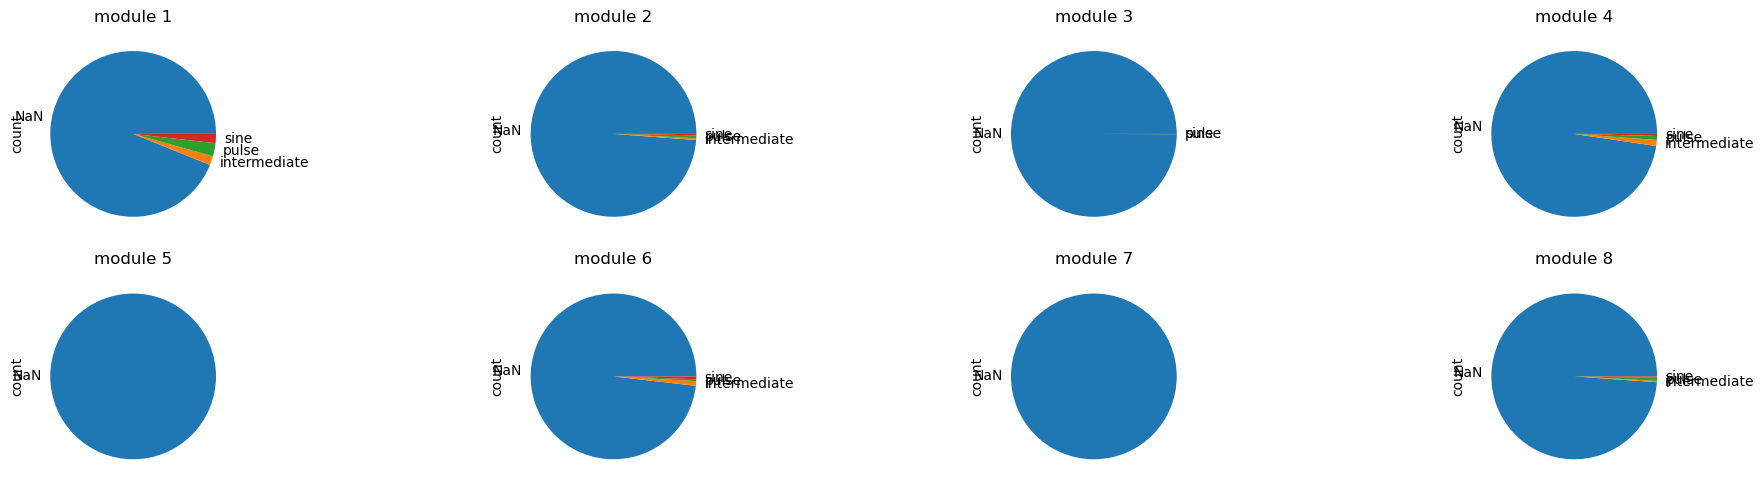

In [ ]:
# pie chart of preference tuning within each module
# include the NaN values for the preference
merged_auditory_NaN = merged_auditory['preference'].fillna('NaN', inplace=True)

fig, ax = plt.subplots(2, 4, figsize=(20, 5))
merged_auditory_NaN[merged_auditory_NaN['0.0']==1].value_counts('preference').sort_index().plot(kind='pie', ax=ax[0, 0], title='module 1')
merged_auditory_NaN[merged_auditory_NaN['0.0']==2].value_counts('preference').sort_index().plot(kind='pie', ax=ax[0, 1], title='module 2')
merged_auditory_NaN[merged_auditory_NaN['0.0']==3].value_counts('preference').sort_index().plot(kind='pie', ax=ax[0, 2], title='module 3')
merged_auditory_NaN[merged_auditory_NaN['0.0']==4].value_counts('preference').sort_index().plot(kind='pie', ax=ax[0, 3], title='module 4')
merged_auditory_NaN[merged_auditory_NaN['0.0']==5].value_counts('preference').sort_index().plot(kind='pie', ax=ax[1, 0], title='module 5')
merged_auditory_NaN[merged_auditory_NaN['0.0']==6].value_counts('preference').sort_index().plot(kind='pie', ax=ax[1, 1], title='module 6')
merged_auditory_NaN[merged_auditory_NaN['0.0']==7].value_counts('preference').sort_index().plot(kind='pie', ax=ax[1, 2], title='module 7')
merged_auditory_NaN[merged_auditory_NaN['0.0']==8].value_counts('preference').sort_index().plot(kind='pie', ax=ax[1, 3], title='module 8')
plt.tight_layout()

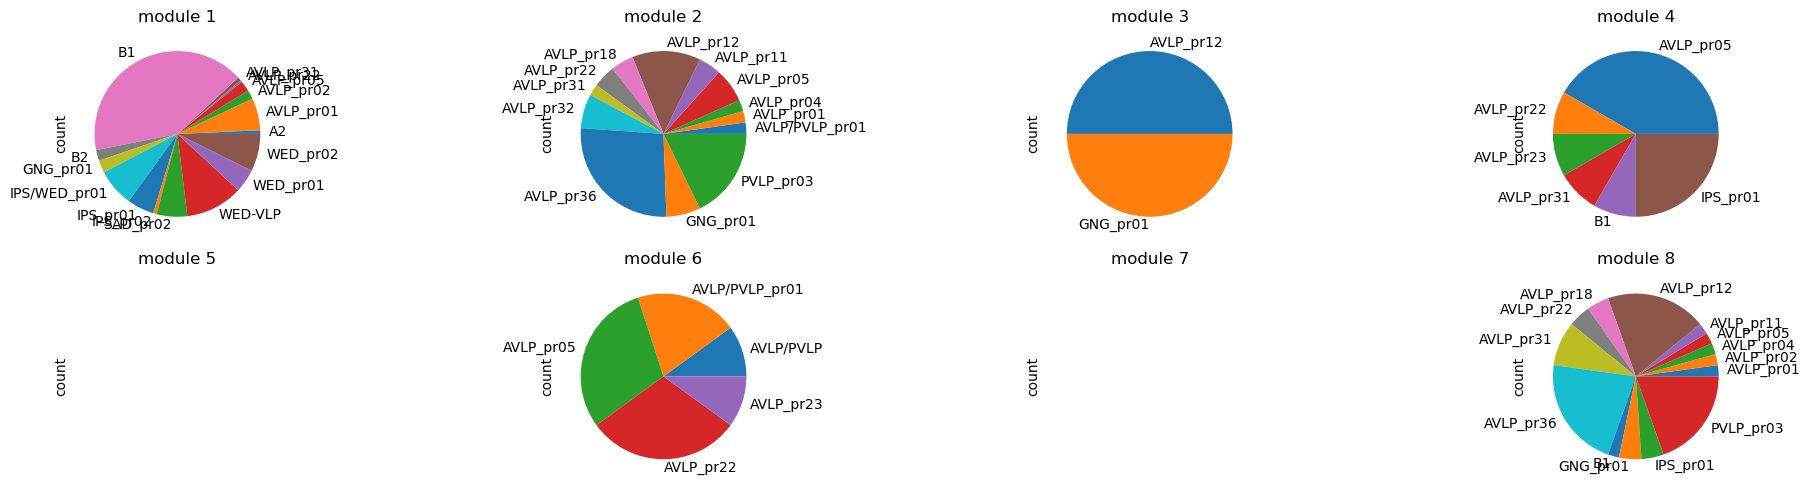

In [ ]:
# pie chart of Neuropils/cell type within each module

# include the NaN values
#merged_auditory_NaN = merged_auditory['Neuropils'].fillna('NaN', inplace=True)

fig, ax = plt.subplots(2, 4, figsize=(20, 5))
merged_auditory[merged_auditory['0.0']==1].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[0, 0], title='module 1')
merged_auditory[merged_auditory['0.0']==2].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[0, 1], title='module 2')
merged_auditory[merged_auditory['0.0']==3].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[0, 2], title='module 3')
merged_auditory[merged_auditory['0.0']==4].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[0, 3], title='module 4')
merged_auditory[merged_auditory['0.0']==5].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[1, 0], title='module 5')
merged_auditory[merged_auditory['0.0']==6].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[1, 1], title='module 6')
merged_auditory[merged_auditory['0.0']==7].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[1, 2], title='module 7')
merged_auditory[merged_auditory['0.0']==8].value_counts('Neuropils').sort_index().plot(kind='pie', ax=ax[1, 3], title='module 8')
plt.tight_layout()

In [34]:
merged_auditory['Neuropils'].value_counts()

Neuropils
B1                120
WED-VLP            32
AVLP_pr36          22
IPS/WED_pr01       21
WED_pr02           21
AVLP_pr01          20
IPS_pr01           20
AVLP_pr05          18
SAD_pr02           17
PVLP_pr03          17
AVLP_pr12          16
WED_pr01           13
GNG_pr01           13
AVLP_pr22           9
AVLP_pr31           8
AVLP_pr02           6
B2                  6
AVLP_pr18           4
AVLP/PVLP_pr01      3
AVLP_pr11           3
AVLP_pr32           3
IPS_pr02            2
AVLP_pr04           2
AVLP_pr23           2
A2                  2
AVLP/PVLP           1
Name: count, dtype: int64

In [57]:
npils = merged_auditory['Neuropils'].value_counts().head(20)

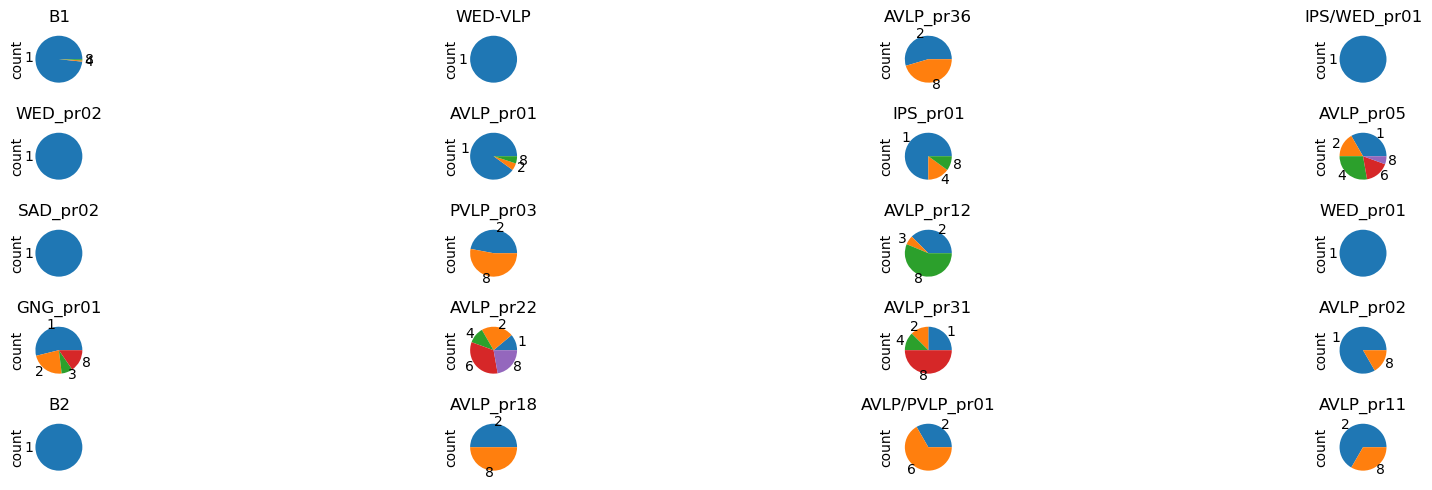

In [65]:
# pie chart of how each cell type is distributed across the modules

fig, ax = plt.subplots(5, 4, figsize=(20, 5))

for i, npil in enumerate(npils.index):
    merged_auditory[merged_auditory['Neuropils']==npil].value_counts('0.0').sort_index().plot(kind='pie', ax=ax[i//4, i%4], title=npil)
plt.tight_layout()


In [59]:
i

19

In [60]:
i//5

3

In [61]:
i%9

1